# Risk Analysis of VaR(Value at Risk) and Sharpe Ratio
1. A histogram of Daily Returns with 5% VaR threshold
2. Cumulative returns annotated with Sharpe Ratio

In [11]:
import sys

sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
from risk_analysis import calculate_var, calculate_sharpe_ratio

# Load cleaned stock data
df = pd.read_csv("../data/cleaned_stock_data.csv", parse_dates= ['Date'], index_col='Date')

df.head()


,Adj Close,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,,
2020-01-02,5.972709,5.99775,5.99775,5.91800,5.96875,237536000,NaN
2020-01-03,5.877111,5.90175,5.94575,5.85250,5.87750,205384000,-0.016006
2020-01-06,5.901759,5.92650,5.93175,5.78175,5.80800,262636000,0.004194
2020-01-07,5.973208,5.99825,6.04425,5.90975,5.95500,314856000,0.012107
2020-01-08,5.984411,6.00950,6.05100,5.95375,5.99400,277108000,0.001875


In [12]:
#Calculate VaR and Sharpe Ratio
confidence_level = 0.05
var = calculate_var(df['Daily Return'], confidence_level)
sharpe_ratio = calculate_sharpe_ratio(df['Daily Return'])

print(f"5% VaR: {var:.4f}")
print(f"Sharpe Ratio {sharpe_ratio: .2f}")

5% VaR: -0.0512
Sharpe Ratio  0.09


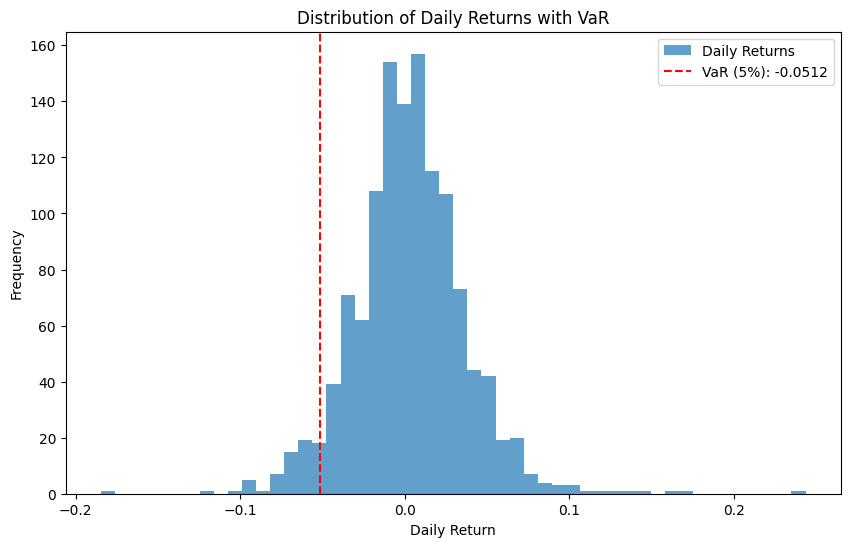

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Return'].dropna(), bins=50, alpha=0.7, label='Daily Returns')
plt.axvline(x=var, color='red', linestyle='--', label=f'VaR (5%): {var:.4f}')
plt.title("Distribution of Daily Returns with VaR")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

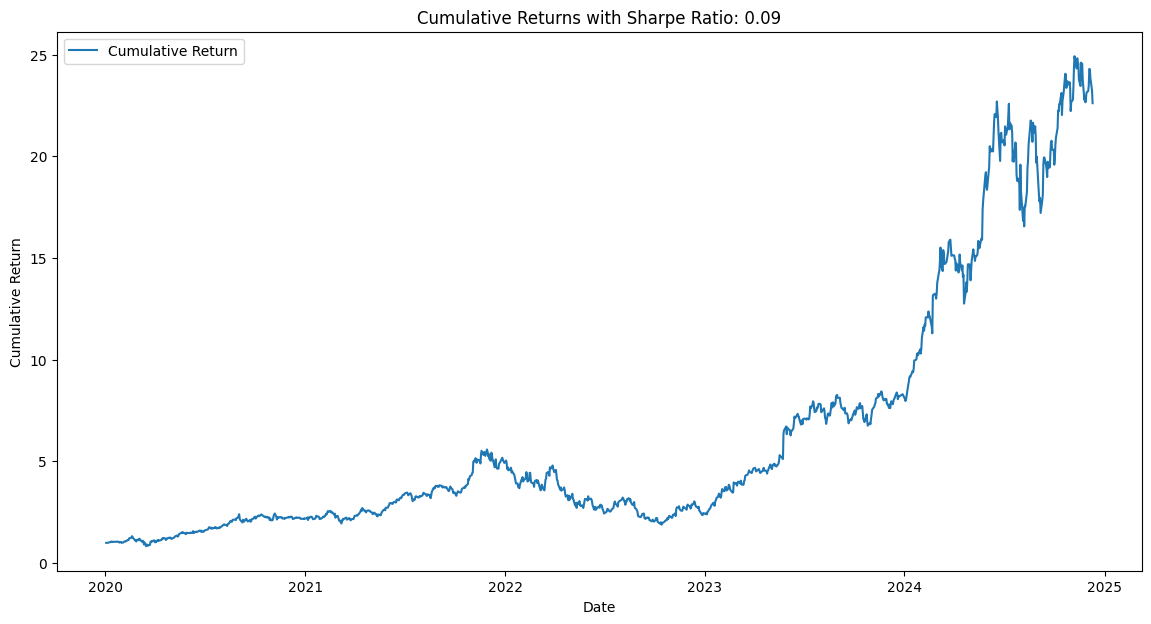

In [18]:
#Cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

#Plot cumulative returns with sharpe ratio annotations
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Cumulative Return'], label='Cumulative Return')
plt.title(f"Cumulative Returns with Sharpe Ratio: {sharpe_ratio:.2f}")
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()